## Package Dependencies

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Retrieve data from Dataset

In [3]:
data = pd.read_csv("./archive/heart.csv")

## Dataset statistics

Top rows of the dataset

In [4]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Dataset statistics summary

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


Dataset shape

In [6]:
print(data.shape)

(303, 14)


Dataset types

In [7]:
print(data.dtypes)

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object


Are there any null values?

In [15]:
any(data.isnull().sum())

False

How many unique values are there in the dataset for each column?

### Output distribution

Text(0, 0.5, 'Count')

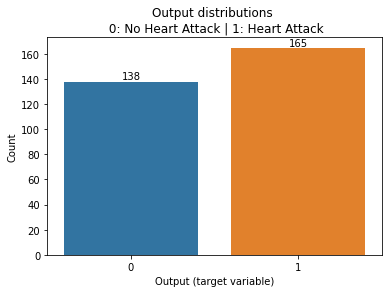

In [8]:
ax = sns.countplot(x='output', data=data)
ax.bar_label(ax.containers[0])
plt.title('Output distributions \n 0: No Heart Attack | 1: Heart Attack', fontsize=12)
plt.xlabel('Output (target variable)')
plt.ylabel('Count')

* ### Count distribution per Age

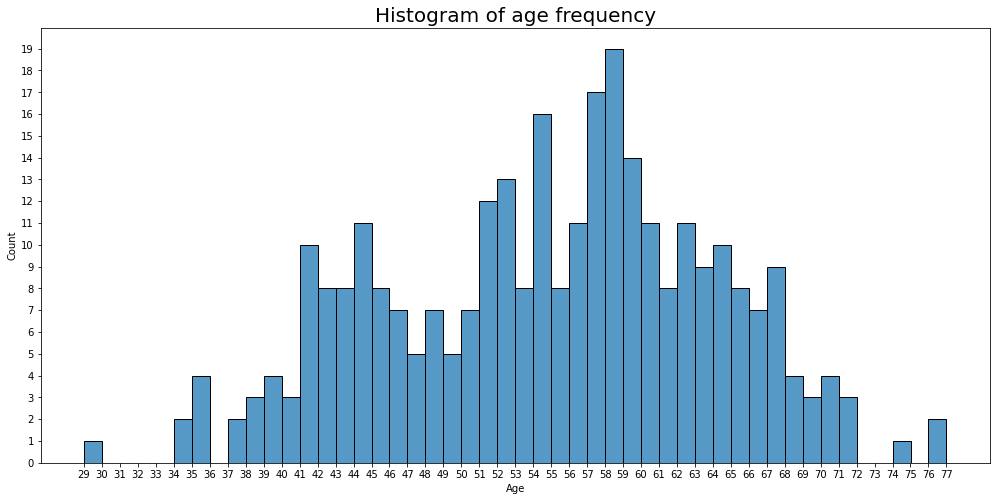

In [9]:
age = data['age']

min_age = min(age)
max_age = max(age)

min_count = 0
max_count = max(age.value_counts())

plt.figure(figsize=(17,8))
plt.title("Histogram of age frequency",size=20)

sns.histplot(data['age'], bins=max_age-min_age)
plt.xticks(list(range(min_age,max_age+1,1)))
plt.yticks(list(range(min_count,max_count+1,1)))
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

* ### Count distribution per Sex

Pie Chart

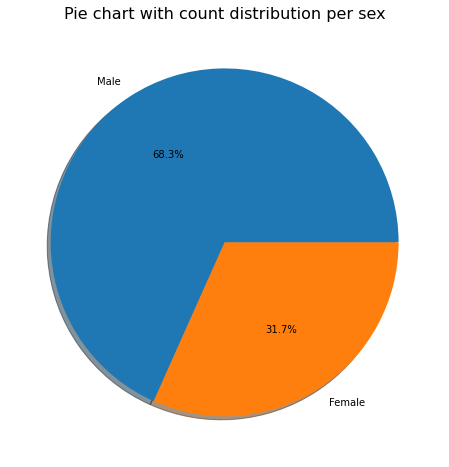

In [10]:
sex = data['sex']
plt.figure(figsize=(8,8), facecolor="white")
plt.title("Pie chart with count distribution per sex", fontsize=16)
plt.pie(sex.value_counts(), labels=["Male","Female"], shadow=True, autopct='%1.1f%%')
plt.show()

Bar Chart

Text(0, 0.5, 'Count')

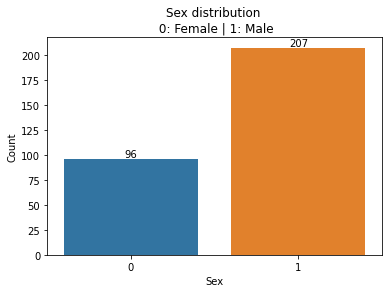

In [11]:
ax = sns.countplot(x='sex', data=data)
ax.bar_label(ax.containers[0])
plt.title('Sex distribution \n 0: Female | 1: Male', fontsize=12)
plt.xlabel('Sex')
plt.ylabel('Count')


The two previous graphs demonstrate that the dataset has 207 males (68.3%) and 96 females (31.7%)


NameError: name 'new_df' is not defined

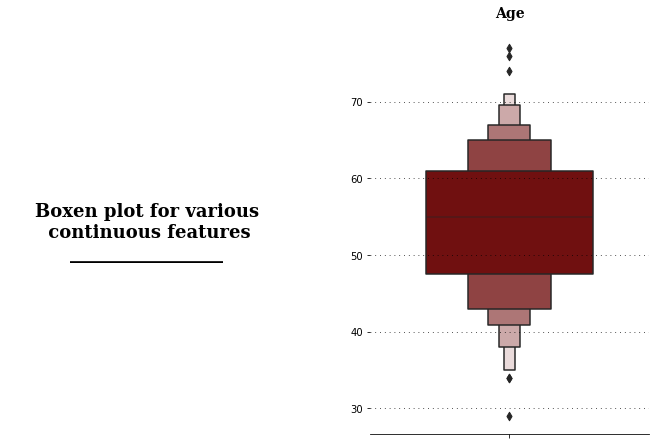

In [12]:
fig = plt.figure(figsize=(18,16))
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Boxen plot for various\n continuous features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Age 
ax1.text(-0.05, 81, 'Age', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax1,y=data['age'],palette=["#800000"],width=0.6)
ax1.set_xlabel("")
ax1.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=new_df, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

## Correlation Matrix

<AxesSubplot:>

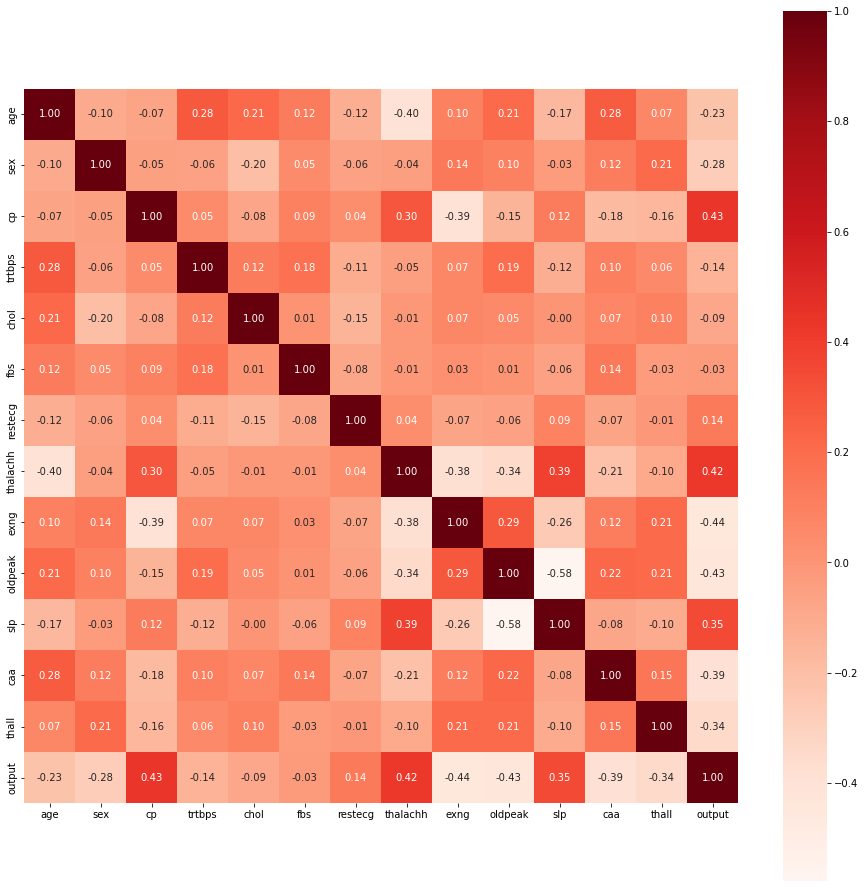

In [24]:
f, ax = plt.subplots(figsize=(16, 16))
correlation = data.corr()
sns.heatmap(correlation, fmt='.3f', annot=True, cmap="Reds", square=True, ax=ax)


## Dataset Analysis

* ### Logistic Regression